In [1]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling
from sklearn.ensemble import RandomForestClassifier  # Machine learning model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation

In [2]:
# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
# Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Fill missing Age values with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-8-a1d82a6a7b6b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [9]:
# Fill missing Embarked values with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [10]:
# Drop the 'Cabin' column since it has many missing values
df.drop(columns=['Cabin'], inplace=True)

In [11]:
# Convert categorical variables into numerical format
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])  # Male=1, Female=0
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

In [12]:
# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [14]:
# Scale the data for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[92 13]
 [19 55]]


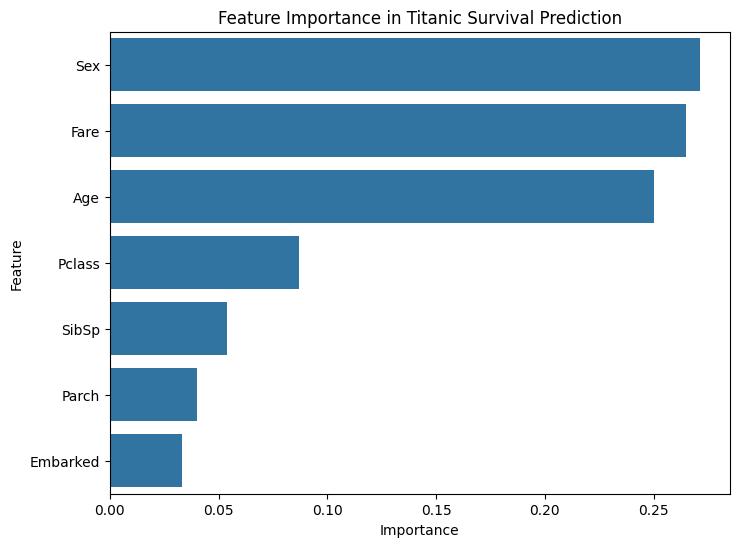

In [18]:
# Visualize feature importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Titanic Survival Prediction")
plt.show()